In [24]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)


Word2Vec(vocab=14, size=100, alpha=0.025)


In [25]:
#After the model is trained, it is accessible via the “wv” attribute. 
#This is the actual word vector model in which queries can be made.

# summarize vocabulary
words = list(model.wv.vocab)
print(words)


['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [26]:
print(model['first'])

[ 0.00359071 -0.00239273 -0.00472285 -0.00242615 -0.0045294   0.00388181
 -0.00257135 -0.00450369 -0.00225304  0.00347563  0.00495925 -0.00494909
  0.0034487  -0.00160662  0.00289214 -0.00410676  0.00493316 -0.00481067
 -0.00395473 -0.00089911 -0.00153712 -0.00097157  0.00107157 -0.00338819
 -0.00496294 -0.00463319 -0.00151178 -0.00013494  0.00393671 -0.00347547
 -0.00363156  0.000585   -0.00183517 -0.00088445 -0.00447844  0.00237723
 -0.00185095 -0.00203011  0.00174351  0.0042939   0.00118095  0.00158426
  0.00067656 -0.00191532  0.00448005 -0.00470267 -0.00304539 -0.00412327
 -0.00050854  0.0007797  -0.0024549   0.00372102 -0.0038551  -0.0036776
  0.00454624 -0.00369002  0.00061623  0.00065687  0.00342428  0.00340039
 -0.0023372   0.00064603  0.0048066   0.00386124  0.00195328  0.00356755
 -0.0046124   0.00063915 -0.00130496  0.00054144  0.00273504 -0.00047079
  0.00052322  0.00028752 -0.00085022 -0.00441497  0.00223993  0.00286568
  0.00056154  0.00306662  0.0036917   0.00245     0.

In [27]:
# access vector for one word
print(model['sentence'])

[ -4.45081340e-03   3.48996744e-03   4.43060556e-03  -2.32827151e-03
  -3.44369211e-03  -1.08549220e-03   2.37962790e-03  -3.04407586e-04
   3.10452329e-03   1.59857795e-03   1.82099850e-03   4.87838686e-03
  -4.22619283e-03   2.68613244e-03  -3.74447624e-03   1.23687950e-03
  -4.06683097e-03   1.05514773e-03   1.44566805e-03  -2.54822313e-04
   1.75854994e-03  -3.40501801e-03  -1.37322361e-03  -1.31301244e-03
  -4.27579600e-03  -4.66051744e-03  -4.88745980e-03  -2.87992926e-03
   4.33907285e-03  -2.17840425e-03  -2.43799109e-03  -1.22931786e-04
   2.74358172e-04   4.67827660e-04  -1.07263029e-03   3.03906226e-03
   3.55150132e-03   1.79673010e-03  -4.67802724e-03  -4.77317162e-03
  -1.70708995e-03   4.85119922e-03  -2.00120732e-03  -3.66813224e-03
  -3.92109761e-03  -3.09508061e-03   1.82569155e-03  -9.70274035e-04
   1.56809721e-04   2.90958304e-03   3.20330705e-03   2.29376392e-03
   2.04983098e-03   7.82689312e-04  -8.71525321e-04   4.00020136e-03
  -9.81651479e-04   3.28705204e-03

In [28]:
# save model
model.save('model.bin')



In [29]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [31]:
from sklearn.decomposition import PCA


# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)


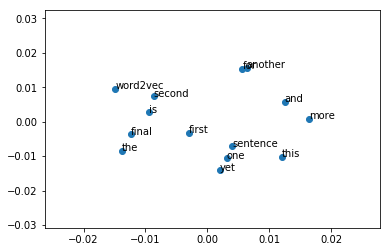

In [32]:
from matplotlib import pyplot
# create a scatter plot of the projection

pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()